In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
!pip install yfinance
import yfinance as yf

In [156]:
data = yf.download("TATACONSUM.NS", start="2023-01-01", end="2023-12-31", group_by='column')
print(data.head(10))

/tmp/ipython-input-156-218714035.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TATACONSUM.NS", start="2023-01-01", end="2023-12-31", group_by='column')
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker     TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS   
Date                                                                 
2023-01-02    743.430908    751.915571    739.334858    750.842822   
2023-01-03    748.160889    748.892324    740.310101    746.064083   
2023-01-04    743.382141    748.502189    740.602711    748.502189   
2023-01-05    744.942505    761.668017    741.285328    743.138321   
2023-01-06    742.504395    751.769242    740.261338    744.893762   
2023-01-09    747.965759    749.769943    742.260528    746.259077   
2023-01-10    750.208862    753.670978    745.625189    747.965806   
2023-01-11    740.505188    753.622275    736.799261    752.890839   
2023-01-12    735.580139    744.942488    733.385833    741.187810   
2023-01-13    734.263611    738.847225    731.435370    736.409107   

Price             Volume  
Ticker     TATACONSUM.NS  
Date                      
2023-01-

In [157]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [158]:
print(data.columns)

MultiIndex([( 'Close', 'TATACONSUM.NS'),
            (  'High', 'TATACONSUM.NS'),
            (   'Low', 'TATACONSUM.NS'),
            (  'Open', 'TATACONSUM.NS'),
            ('Volume', 'TATACONSUM.NS')],
           names=['Price', 'Ticker'])


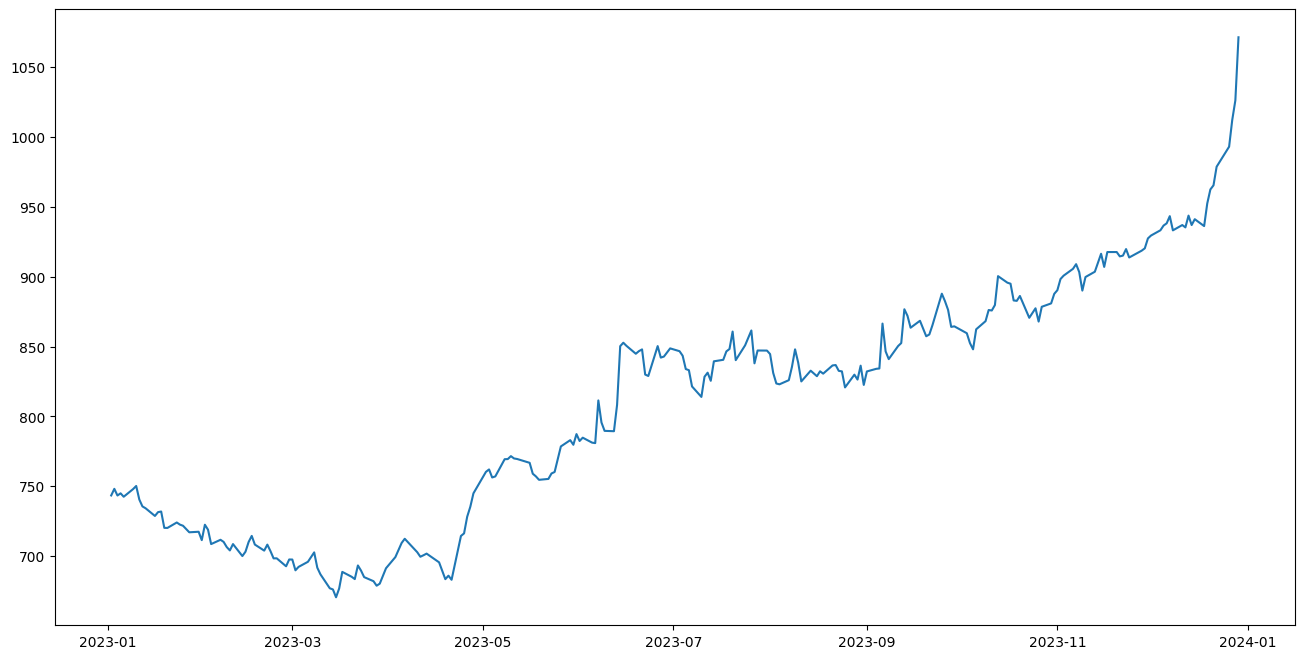

In [159]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price')


In [160]:
data['Open-Close'] = data['Open'] - data['Close']
data['High-Low'] = data['High'] - data['Low']
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['Price_Change'] = data['Close'].pct_change()

data.dropna(inplace = True)

In [161]:
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [162]:
X = data[['Open-Close', 'High-Low', 'SMA_5', 'SMA_10', 'Price_Change']]
Y = data['Target']
X.head()

Price,Open-Close,High-Low,SMA_5,SMA_10,Price_Change
Ticker,,,,,
Date,,,,,
2023-01-13,2.145496,7.411855,741.704712,743.094440,-0.001790
2023-01-16,4.729924,9.654970,737.862231,741.626685,-0.007504
2023-01-17,-5.900233,10.922780,734.117285,739.959009,0.003747
2023-01-18,-0.487624,5.997794,732.400842,738.813092,0.000600
2023-01-19,11.410404,14.775018,729.328821,736.340845,-0.015989


In [163]:
Y

,Target
Date,
2023-01-13,-1
2023-01-16,1
2023-01-17,1
2023-01-18,-1
2023-01-19,-1
...,...
2023-12-22,1
2023-12-26,1
2023-12-27,1


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=44)


In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [171]:
paramtr ={'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn =neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,paramtr,cv=5)
model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [172]:
accuracy_train =accuracy_score(Y_train,model.predict(X_train))
accuracy_test =accuracy_score(Y_test,model.predict(X_test))
print('Train data accuracy:%.2f' %accuracy_train)
print('Test data accuracy: %.2f' %accuracy_test)

Train data accuracy:0.67
Test data accuracy: 0.51


In [140]:
prediction_class =model.predict(X_test)


In [142]:
actual_prediction =pd.DataFrame({'Actual':Y_test.ravel(),'Prediction':prediction_class.ravel()})

In [144]:
actual_prediction.head(10)

,Actual,Prediction
0,1,1
1,1,-1
2,1,1
3,1,1
4,-1,1
5,1,-1
6,1,-1
7,-1,1
8,1,1
9,1,-1


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Prediction'].plot(kind='hist', bins=20, title='Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual', y='Prediction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Prediction'].plot(kind='line', figsize=(8, 4), title='Prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

In [143]:
y=data['Close']

In [145]:
y

Ticker,TATACONSUM.NS
Date,
2023-01-02,743.430908
2023-01-03,748.160889
2023-01-04,743.382141
2023-01-05,744.942505
2023-01-06,742.504395
...,...
2023-12-22,978.748230
2023-12-26,993.092224
2023-12-27,1012.217712
